In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LogisticRegression
import difflib
from sklearn.dummy import DummyClassifier
from tqdm import tqdm

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(X, y), (Xt, yt) = mnist.load_data()

In [3]:
Xo=X.reshape((-1, 28* 28)).astype('float32') #/ 255.0
Xto=Xt.reshape((-1, 28* 28)).astype('float32')# / 255.0

In [4]:
# Preprocess the data
train_images = X.reshape((-1, 28, 28, 1)).astype('float32')# / 255.0
test_images = Xt.reshape((-1, 28, 28, 1)).astype('float32')# / 255.0
train_labels = tf.keras.utils.to_categorical(y, 10)
test_labels = tf.keras.utils.to_categorical(yt, 10)

### Methods to assess the performance of each classifier

As stated, the idea of implementing a polynomial classifier was set; however, to assess the polynomial classifier objectively a direct comparison between the polynomial classifier and other machine learning methods is necessary. For this reason, a classification report as well as the confusion matrix for each classifier is a coded method.

In [5]:
def sk_metrics(y_test,prediction_test,x_test,clf):

    print('Testing set')
    print('===========')
    print(classification_report(y_test, prediction_test, zero_division=0))
    # confusion matrix
    ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, values_format='.0f')
    plt.show()

In [6]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(Xo, y)
preds = dummy_clf.predict(Xto)

Testing set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



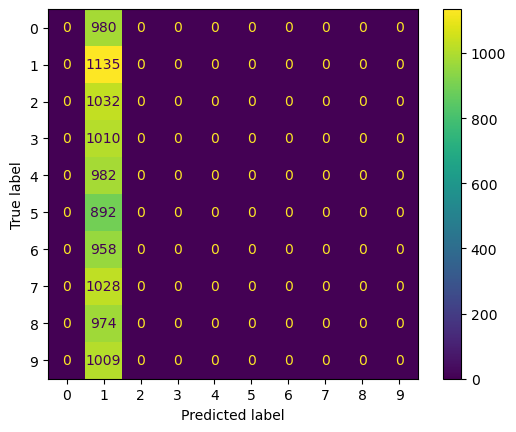

In [7]:
sk_metrics(yt,preds,Xto,dummy_clf)

In [8]:
class D2MV(object):
    def __init__(self, valid_data, eval_data,w=None):
        super(object, self).__init__()
        self.validation_data = valid_data
        self.evaluation_data = eval_data
        
    def separate(self,imp,lotion):
        T = []
        Y0=self.evaluation_data
        X0 = self.validation_data # images

        for x in range(len(set(Y0))):
            T.append([])
            
        for x,i in enumerate(Y0):
            T[i].append(lotion[x])
            
        return T

    
    def EuC(self,error,test): 
        euge = []
        for t in error:
            sm = difflib.SequenceMatcher(None,t,test)
            aha = sm.ratio()
            euge.append(aha)
        return np.max(euge)
    
    
    def unify1(self,XtX):
        res = []
        for j,k in enumerate(XtX):
            M = []
            for i,l in enumerate(k):
                if l != 0:
                    M.append(i)
                else:
                    M.append(0)
                
            res.append(M)
        return res
    
    def unify2(self,XtX):
        res = []
        for j,k in enumerate(XtX):
            M = []
            for i,l in enumerate(k):
                if l == 0:
                    M.append(i)
                else:
                    M.append(0)
            res.append(M)
        return res
   
    def P1(self,):
        X = self.validation_data
        res = []
       # print(len(X))
        for j,k in enumerate(X):
            M = []
            for i,l in enumerate(k):
                if l != 0:
                    M.append(i)
                else:
                    M.append(0)
                
            res.append(M)
        return res
        
    def P2(self,):
        X = self.validation_data
        res = []
       # print(len(X))
        for j,k in enumerate(X):
            M = []
            for i,l in enumerate(k):
                if l == 0:
                    M.append(i)
                else:
                    M.append(0)
            res.append(M)
        return res
            
    def classify(self,test_data):
        arr = set(self.evaluation_data)
        X0 = self.validation_data
        Y0 = self.evaluation_data
        
        Xi = self.P2()
        
        test_data_i = self.unify2(test_data)
        
        
        
        Xj = self.P1()
        
        test_data_j = self.unify1(test_data)
        
        

        train_x = []
        for i,j in enumerate(X0):
            a = Xi[i]
            b = Xj[i]
            matrix =[j,a,b]
            #https://note.nkmk.me/en/python-list-flatten/
            flat = [x for row in matrix for x in row]
            train_x.append(flat)
        hoc = self.separate(X0,train_x)
        
        test_x = []
        for i,j in enumerate(test_data):        
            a = test_data_i[i]
            b = test_data_j[i]
            matrix =[j,a,b]
            #https://note.nkmk.me/en/python-list-flatten/
            flat = [x for row in matrix for x in row]
            test_x.append(flat)
        
        land = []
        for al8da in tqdm(range(len(test_x)),ascii=' >=',bar_format='{desc:<5.5}{percentage:3.0f}%|{bar:50}{r_bar}'):
            mos = []
            for ad in range(len(arr)):
                ris = self.EuC(hoc[ad],test_x[al8da])
                mos.append(ris)
            land.append(np.argmax(mos))

        return land
        

In [9]:
AK = D2MV(Xo[:25],y[:25])
preds = AK.classify(Xto[:1000])

     100%|==================================================| 1000/1000 [01:53<00:00,  8.82it/s]


Testing set
VV_______VV
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        85
           1       0.47      0.97      0.64       126
           2       0.38      0.26      0.31       116
           3       0.37      0.63      0.47       107
           4       0.60      0.34      0.43       110
           5       0.38      0.18      0.25        87
           6       0.73      0.75      0.74        87
           7       0.50      0.21      0.30        99
           8       0.44      0.12      0.19        89
           9       0.32      0.53      0.40        94

    accuracy                           0.47      1000
   macro avg       0.49      0.46      0.43      1000
weighted avg       0.48      0.47      0.44      1000



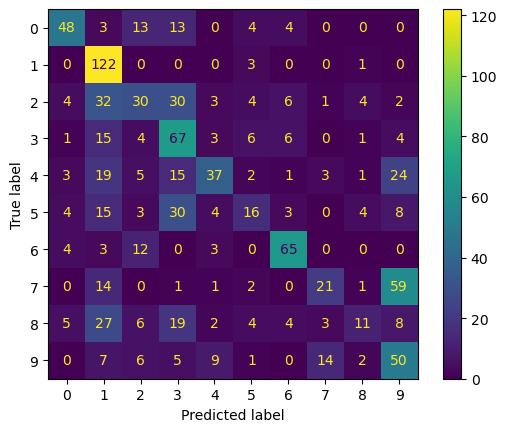

In [11]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______VV')
print(classification_report(yt[:1000], preds))


# test: confusion matrix
cf_matrix = confusion_matrix(yt[:1000], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

In [ ]:
neigh = LogisticRegression()
neigh.fit(Xo, y)
preds = neigh.predict(Xto)

In [ ]:
sk_metrics(yt,preds,Xto,neigh)

In [12]:
AK = D2MV(Xo[:100],y[:100])
preds = AK.classify(Xto[:1000])

     100%|==================================================| 1000/1000 [06:53<00:00,  2.42it/s]


Testing set
VV_______PP
              precision    recall  f1-score   support

           0       0.50      0.68      0.57        85
           1       0.65      0.99      0.79       126
           2       0.57      0.27      0.36       116
           3       0.54      0.63      0.58       107
           4       0.47      0.62      0.53       110
           5       0.44      0.09      0.15        87
           6       0.66      0.72      0.69        87
           7       0.61      0.63      0.62        99
           8       0.54      0.43      0.48        89
           9       0.25      0.22      0.24        94

    accuracy                           0.54      1000
   macro avg       0.52      0.53      0.50      1000
weighted avg       0.53      0.54      0.51      1000



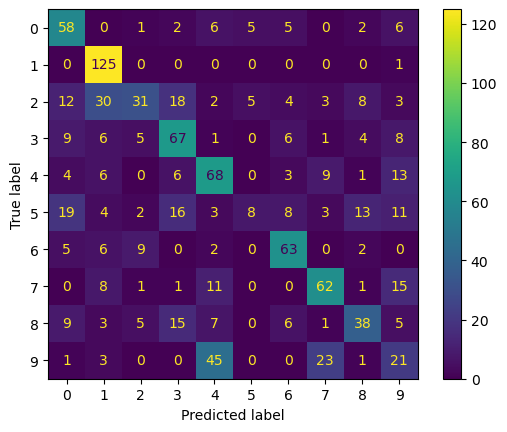

In [14]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______PP')
print(classification_report(yt[:1000], preds))


# test: confusion matrix
cf_matrix = confusion_matrix(yt[:1000], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

In [15]:
AK = D2MV(Xo[:250],y[:250])
preds = AK.classify(Xto[:100])

     100%|==================================================| 100/100 [01:41<00:00,  1.01s/it]


Testing set
VV_______PP
              precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       0.82      1.00      0.90        14
           2       0.33      0.25      0.29         8
           3       0.64      0.64      0.64        11
           4       0.69      0.64      0.67        14
           5       0.50      0.14      0.22         7
           6       0.86      0.60      0.71        10
           7       1.00      0.60      0.75        15
           8       0.50      0.50      0.50         2
           9       0.50      0.82      0.62        11

    accuracy                           0.66       100
   macro avg       0.64      0.62      0.60       100
weighted avg       0.69      0.66      0.65       100



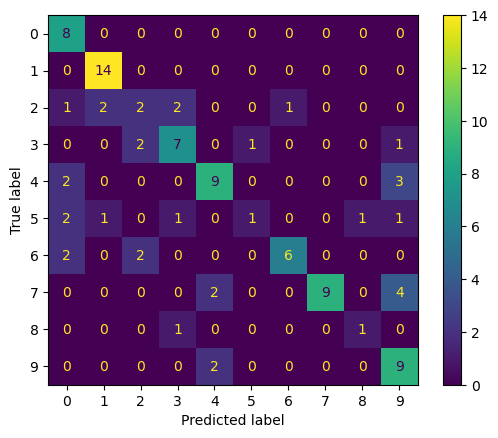

In [16]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______PP')
print(classification_report(yt[:100], preds))


# test: confusion matrix
cf_matrix = confusion_matrix(yt[:100], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

In [17]:
AK = D2MV(Xo[:500],y[:500])
preds = AK.classify(Xto[:100])

     100%|==================================================| 100/100 [03:24<00:00,  2.05s/it]


Testing set
VV_______PP
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       0.76      0.93      0.84        14
           2       0.71      0.62      0.67         8
           3       0.88      0.64      0.74        11
           4       0.73      0.57      0.64        14
           5       0.40      0.29      0.33         7
           6       1.00      0.80      0.89        10
           7       0.85      0.73      0.79        15
           8       0.50      0.50      0.50         2
           9       0.47      0.73      0.57        11

    accuracy                           0.71       100
   macro avg       0.70      0.68      0.68       100
weighted avg       0.73      0.71      0.71       100



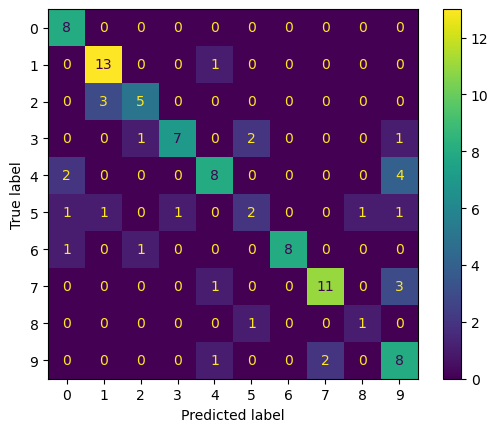

In [18]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______PP')
print(classification_report(yt[:100], preds))


# test: confusion matrix
cf_matrix = confusion_matrix(yt[:100], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

In [19]:
AK = D2MV(Xo[:1000],y[:1000])
preds = AK.classify(Xto[:100])

     100%|==================================================| 100/100 [06:51<00:00,  4.11s/it]


Testing set
VV_______PP
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.81      0.93      0.87        14
           2       0.80      0.50      0.62         8
           3       0.75      0.55      0.63        11
           4       0.82      0.64      0.72        14
           5       0.43      0.43      0.43         7
           6       0.90      0.90      0.90        10
           7       0.73      0.73      0.73        15
           8       0.20      0.50      0.29         2
           9       0.40      0.55      0.46        11

    accuracy                           0.69       100
   macro avg       0.67      0.66      0.65       100
weighted avg       0.72      0.69      0.70       100



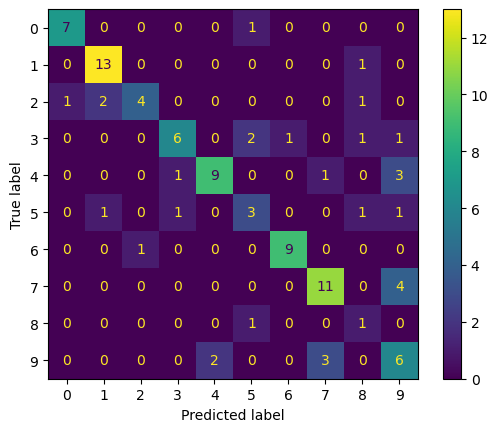

In [20]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______PP')
print(classification_report(yt[:100], preds))


# test: confusion matrix
cf_matrix = confusion_matrix(yt[:100], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

In [ ]:
AK = D2MV(Xo[:5000],y[:5000])
preds = AK.classify(Xto[:100])

      52%|==========================                        | 52/100 [18:08<16:54, 21.14s/it]

In [ ]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______PP')
print(classification_report(yt[:100], preds))


# test: confusion matrix
cf_matrix = confusion_matrix(yt[:100], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()